# 3. Edge detection エッジ検出

エッジ検出の目的は、元の画像属性を保持したまま、画像データサイズを大幅に削減することである。

キャニーエッジ検出は、異なる視覚オブジェクトから有用な構造情報を抽出することであり、処理する必要のあるデータ量を大幅に削減することができる。様々なコンピュータビジョンシステムで広く使用されている。

エッジ検出の基準

低いエラー率でエッジを検出すること。

検出されたエッジは実際のエッジの中心に正確に位置すること。

画像中の与えられたエッジは一度だけマークされるべきで、画像のノイズが偽エッジを生成してはならない。

キャニーエッジ検出アルゴリズムは以下の5つのステップに分けられる：

1) ガウシアンフィルターを使って画像を滑らかにし、ノイズを除去する。

2) 画像の各ピクセルの勾配強度と方向を計算する。

3) エッジ検出によるスプリアス応答を除去するために、非最大抑制を適用する。

4) 二重閾値検出を適用し、真のエッジと潜在的なエッジを判定する。

5) 孤立した弱いエッジを抑制することにより、エッジ検出を確定する。

つの比較画像

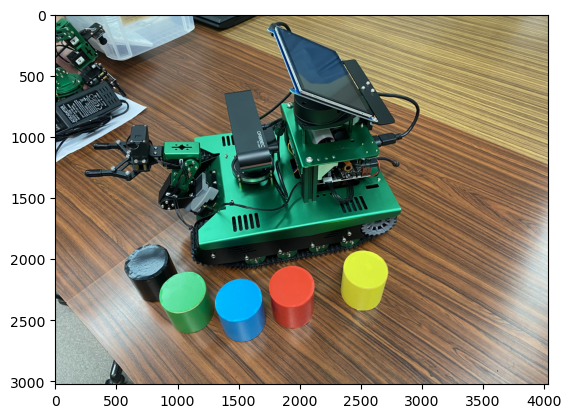

In [3]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('yahboom.jpg',1)

img_bgr2rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_bgr2rgb1)
plt.show()

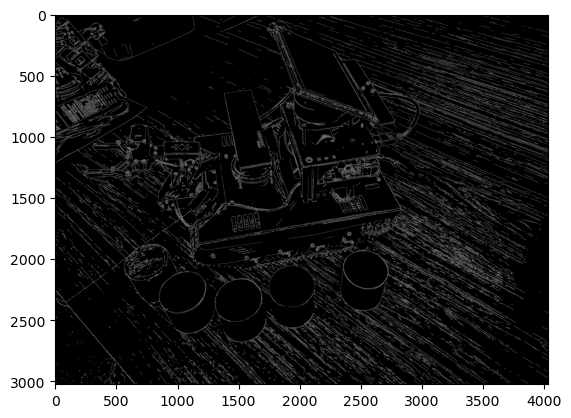

In [5]:
dst = cv2.Canny(img, 100, 200)
img_bgr2rgb1 = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(img_bgr2rgb1)
plt.show()

In [9]:
# Method 2
import cv2
import numpy as np
import random
import math
img = cv2.imread('yahboom.jpg',1)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]

# cv2.imshow('src',img)
# ソベル 1 オペレーター・テンプレート 2 画像畳み込み 3 しきい値決定
# [1 2 1          [ 1 0 -1
#  0 0 0            2 0 -2
# -1 -2 -1 ]        1 0 -1 ]

# [1 2 3 4] [a b c d] a*1+b*2+c*3+d*4 = dst
# sqrt(a*a+b*b) = f>th

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
dst = np.zeros((height,width,1), np.uint8)
for i in range(0, height-2):
    for j in range(0, width-2):
        # 縦方向の輪郭検出
        gy = gray[i,j]*1 + gray[i,j+1]*2 + gray[i,j+2]*1 - gray[i+2,j]*1 - gray[i+2,j+1]*2 - gray[i+2,j+2]*1
        # 横方向の輪郭検出
        gx = gray[i,j] + gray[i+1,j]*2 + gray[i+2,j] - gray[i,j+2] - gray[i+1,j+2]*2 - gray[i+2,j+2]
        grad = math.sqrt(gx*gx+gy*gy)
        if grad > 50:
            dst[i,j] = 255
        else:
            dst[i,j] = 0

# cv2.imshow('dst',dst)
    # cv2.waitKey(0)

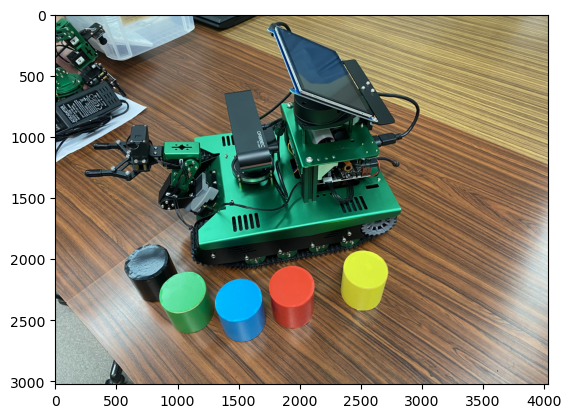

In [10]:
import matplotlib.pyplot as plt

img_bgr2rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_bgr2rgb1)
plt.show()

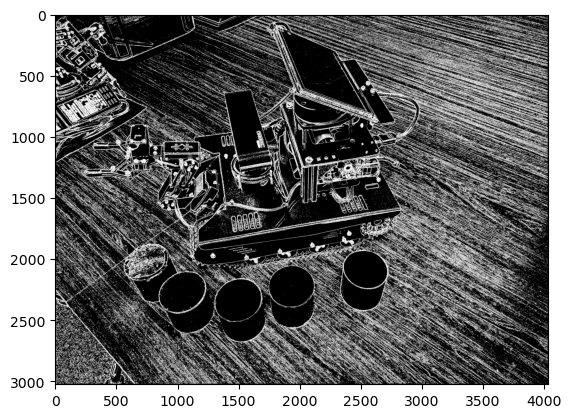

In [11]:
img_bgr2rgb1 = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(img_bgr2rgb1)
plt.show()